In [1]:
#Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# from sportsreference.nba.teams import Teams

In [2]:
#Importing the processed data
all_df = pd.read_csv("../Data/total_stats.csv")

all_df.head()

,Unnamed: 0,abbreviation,assists,blocks,defensive_rebounds,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempts,free_throw_percentage,...,three_point_field_goal_attempts,three_point_field_goal_percentage,three_point_field_goals,total_rebounds,turnovers,two_point_field_goal_attempts,two_point_field_goal_percentage,two_point_field_goals,W,Season
0,0,GSW,2402,612,2877,6981,0.503,3509,1668,0.815,...,2370,0.391,926,3568,1267,4611,0.560,2583,58,2017-2018
1,1,HOU,1767,392,2825,6906,0.460,3174,2061,0.781,...,3470,0.362,1256,3564,1135,3436,0.558,1918,65,2017-2018
2,2,NOP,2195,485,2924,7241,0.483,3500,1716,0.772,...,2312,0.362,837,3636,1223,4929,0.540,2663,48,2017-2018
3,3,TOR,1995,500,2807,7169,0.472,3383,1790,0.794,...,2705,0.358,968,3607,1095,4464,0.541,2415,59,2017-2018
4,4,CLE,1916,312,2761,6950,0.476,3311,1909,0.779,...,2636,0.372,981,3455,1126,4314,0.540,2330,50,2017-2018


In [3]:
# Assign the data to X and y

X = all_df[["abbreviation","Season","assists", 'defensive_rebounds','field_goal_percentage','field_goals','opp_assists',
                        'opp_blocks','opp_defensive_rebounds', 'opp_field_goal_percentage','opp_points',
                        'opp_three_point_field_goal_percentage','opp_total_rebounds','opp_two_point_field_goal_percentage',
                        'points', 'three_point_field_goal_percentage', 'total_rebounds','two_point_field_goal_percentage']].set_index(['abbreviation', 'Season'])
y = all_df["W"].values.reshape(-1, 1)
#Checking the shapes
print(X.shape, y.shape)

(90, 16) (90, 1)


In [4]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [5]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions = predictions.flatten()

#Printing the model MSE and Score for evaluation
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")


lin_reg = pd.DataFrame({"Prediction": np.round(predictions , 2), "Actual": y_test.ravel()})

X_test.reset_index(inplace = True)

df_out = pd.merge(X_test, lin_reg, how = 'left',left_index = True, right_index = True)

linear_Model_df = df_out.loc[:,['Season', 'abbreviation', 'Prediction', 'Actual']]


#Writing the results to a csv and viewing the output 
linear_Model_df.to_csv('../Data/Linear_Model_Predictions.csv', index = False)

linear_Model_df

MSE: 9.026175244081452, R2: 0.9256948847787256


,Season,abbreviation,Prediction,Actual
0,2018-2019,HOU,48.43,53
1,2017-2018,MIA,40.69,44
2,2018-2019,MIA,37.23,39
3,2019-2020,MIA,40.07,41
4,2017-2018,GSW,55.28,58
5,2017-2018,SAS,47.67,47
6,2018-2019,WAS,31.54,32
7,2019-2020,NOP,32.77,28
8,2017-2018,LAL,38.49,35
9,2018-2019,BRK,41.33,42


In [6]:
# Assign the data to X and y and reset model input

X = all_df[["abbreviation","Season","assists", 'defensive_rebounds','field_goal_percentage','field_goals','opp_assists',
                        'opp_blocks','opp_defensive_rebounds', 'opp_field_goal_percentage','opp_points',
                        'opp_three_point_field_goal_percentage','opp_total_rebounds','opp_two_point_field_goal_percentage',
                        'points', 'three_point_field_goal_percentage', 'total_rebounds','two_point_field_goal_percentage']].set_index(['abbreviation', 'Season'])
y = all_df["W"].values.reshape(-1, 1)
print(X.shape, y.shape)

# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

(90, 16) (90, 1)


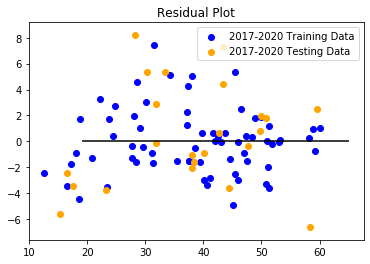

In [7]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
predictions = model.predict(X_test)
model.fit(X_train, y_train)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="2017-2020 Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="2017-2020 Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [8]:
# Assign the data to X and y  and reset model input

X = all_df[["abbreviation","Season","assists", 'defensive_rebounds','field_goal_percentage','field_goals','opp_assists',
                        'opp_blocks','opp_defensive_rebounds', 'opp_field_goal_percentage','opp_points',
                        'opp_three_point_field_goal_percentage','opp_total_rebounds','opp_two_point_field_goal_percentage',
                        'points', 'three_point_field_goal_percentage', 'total_rebounds','two_point_field_goal_percentage']].set_index(['abbreviation', 'Season'])
y = all_df["W"].values.reshape(-1, 1)
print(X.shape, y.shape)

# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

(90, 16) (90, 1)


In [9]:
# LASSO model

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train, y_train)

predictions = lasso.predict(X_test)

#Printing the model MSE and Score for evaluation
MSE = mean_squared_error(y_test, predictions)
r2 = lasso.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

lasso_model = pd.DataFrame({"Prediction": np.round(predictions , 2), "Actual": y_test.ravel()})

X_test.reset_index(inplace = True)

df_out = pd.merge(X_test, lasso_model, how = 'left',left_index = True, right_index = True)

Lasso_Model_df = df_out.loc[:,['Season', 'abbreviation', 'Prediction', 'Actual']]

#Writing the results to a csv and viewing the output 
Lasso_Model_df.to_csv('../Data/Lasso_Model_Predictions.csv', index = False)

Lasso_Model_df

MSE: 9.190889061349019, R2: 0.9243389306963333


,Season,abbreviation,Prediction,Actual
0,2018-2019,HOU,50.27,53
1,2017-2018,MIA,40.75,44
2,2018-2019,MIA,38.67,39
3,2019-2020,MIA,37.85,41
4,2017-2018,GSW,55.57,58
5,2017-2018,SAS,45.70,47
6,2018-2019,WAS,34.60,32
7,2019-2020,NOP,32.56,28
8,2017-2018,LAL,37.69,35
9,2018-2019,BRK,40.04,42


In [10]:
# Assign the data to X and y  and reset model input

X = all_df[["abbreviation","Season","assists", 'defensive_rebounds','field_goal_percentage','field_goals','opp_assists',
                        'opp_blocks','opp_defensive_rebounds', 'opp_field_goal_percentage','opp_points',
                        'opp_three_point_field_goal_percentage','opp_total_rebounds','opp_two_point_field_goal_percentage',
                        'points', 'three_point_field_goal_percentage', 'total_rebounds','two_point_field_goal_percentage']].set_index(['abbreviation', 'Season'])
y = all_df["W"].values.reshape(-1, 1)
print(X.shape, y.shape)

# Use train_test_split to create training and testing data 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

(90, 16) (90, 1)


In [11]:
# Ridge model

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train, y_train)

predictions = ridge.predict(X_test)
predictions = predictions.flatten()

y_test = y_test.flatten()

#Printing the model MSE and Score for evaluation
MSE = mean_squared_error(y_test, predictions)
r2 = ridge.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

ridge_model = pd.DataFrame({"Prediction": np.round(predictions , 2), "Actual": y_test.ravel()})

X_test.reset_index(inplace = True)

df_out = pd.merge(X_test, ridge_model, how = 'left',left_index = True, right_index = True)

Ridge_Model_df = df_out.loc[:,['Season', 'abbreviation', 'Prediction', 'Actual']]

#Writing the results to a csv and viewing the output 
Ridge_Model_df.to_csv('../Data/Ridge_Model_Predictions.csv', index = False)

Ridge_Model_df

MSE: 8.661956943394413, R2: 0.9286931960308801


,Season,abbreviation,Prediction,Actual
0,2018-2019,HOU,49.61,53
1,2017-2018,MIA,40.57,44
2,2018-2019,MIA,38.22,39
3,2019-2020,MIA,39.22,41
4,2017-2018,GSW,55.71,58
5,2017-2018,SAS,45.93,47
6,2018-2019,WAS,33.42,32
7,2019-2020,NOP,32.95,28
8,2017-2018,LAL,37.78,35
9,2018-2019,BRK,40.45,42


In [12]:
# Assign the data to X and y and reset model input

X = all_df[["abbreviation","Season","assists", 'defensive_rebounds','field_goal_percentage','field_goals','opp_assists',
                        'opp_blocks','opp_defensive_rebounds', 'opp_field_goal_percentage','opp_points',
                        'opp_three_point_field_goal_percentage','opp_total_rebounds','opp_two_point_field_goal_percentage',
                        'points', 'three_point_field_goal_percentage', 'total_rebounds','two_point_field_goal_percentage']].set_index(['abbreviation', 'Season'])
y = all_df["W"].values.reshape(-1, 1)
print(X.shape, y.shape)

# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

(90, 16) (90, 1)


In [13]:
# ElasticNet model

from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train, y_train)

predictions = elasticnet.predict(X_test)

#Printing the model MSE and Score for evaluation
MSE = mean_squared_error(y_test, predictions)
r2 = elasticnet.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

elastic_model = pd.DataFrame({"Prediction": np.round(predictions , 2), "Actual": y_test.ravel()})

X_test.reset_index(inplace = True)

df_out = pd.merge(X_test, elastic_model, how = 'left',left_index = True, right_index = True)

ElasticNet_Model_df = df_out.loc[:,['Season', 'abbreviation', 'Prediction', 'Actual']]

#Writing the results to a csv and viewing the output 
ElasticNet_Model_df.to_csv('../Data/ElasticNet_Model_Predictions.csv', index = False)

ElasticNet_Model_df

MSE: 9.175669378472884, R2: 0.9244642218921232


,Season,abbreviation,Prediction,Actual
0,2018-2019,HOU,50.26,53
1,2017-2018,MIA,40.75,44
2,2018-2019,MIA,38.66,39
3,2019-2020,MIA,37.88,41
4,2017-2018,GSW,55.57,58
5,2017-2018,SAS,45.71,47
6,2018-2019,WAS,34.57,32
7,2019-2020,NOP,32.57,28
8,2017-2018,LAL,37.69,35
9,2018-2019,BRK,40.04,42


In [14]:
#Importing the 2015-2018 dataset to create new X and y values
Unseen_stats = pd.read_csv("../Data/Unseen_stats.csv")
X = Unseen_stats[["abbreviation","Season","assists", 'defensive_rebounds','field_goal_percentage','field_goals','opp_assists',
                        'opp_blocks','opp_defensive_rebounds', 'opp_field_goal_percentage','opp_points',
                        'opp_three_point_field_goal_percentage','opp_total_rebounds','opp_two_point_field_goal_percentage',
                        'points', 'three_point_field_goal_percentage', 'total_rebounds','two_point_field_goal_percentage']].set_index(['abbreviation', 'Season'])
y = Unseen_stats["W"].values.reshape(-1, 1)
print(X.shape, y.shape)

(90, 16) (90, 1)


In [15]:
#New train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions = predictions.flatten()


MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")


lin_reg = pd.DataFrame({"Prediction": np.round(predictions , 2), "Actual": y_test.ravel()})

X_test.reset_index(inplace = True)

df_out = pd.merge(X_test, lin_reg, how = 'left',left_index = True, right_index = True)

df_out = df_out.loc[:,['Season', 'abbreviation', 'Prediction', 'Actual']]
df_out

MSE: 15.512789630297371, R2: 0.8857479782470511


,Season,abbreviation,Prediction,Actual
0,2016-2017,OKC,39.59,47
1,2015-2016,MIA,42.18,48
2,2016-2017,DET,35.14,37
3,2017-2018,LAL,36.57,35
4,2015-2016,GSW,71.13,73
5,2015-2016,NYK,33.00,32
6,2016-2017,TOR,54.94,51
7,2017-2018,DEN,43.11,46
8,2015-2016,CHO,51.13,48
9,2016-2017,IND,43.27,42


In [16]:
#prediction 15-19 with 18-19 being unseen data
#Importing the 2018-2019 data to be tested
from sportsreference.nba.teams import Teams


teams = Teams("2019")

stats_18_19 = teams.dataframes

wins_18_19 = pd.read_csv('../Data/team_wins_18_19.csv')  

#Merging team stats for the 2018-2019 season
stats_18_19 = stats_18_19.merge(wins_18_19, left_on='abbreviation', right_on='abbreviation')
stats_18_19 = stats_18_19.assign(Season=['2018-2019'] * 30)
stats_18_19.head()

#creating the model
model = LinearRegression()
model.fit(X, y)

#assigning the unseen data to variables
new_input = stats_18_19[["abbreviation","Season","assists", 'defensive_rebounds','field_goal_percentage','field_goals','opp_assists',
                        'opp_blocks','opp_defensive_rebounds', 'opp_field_goal_percentage','opp_points',
                        'opp_three_point_field_goal_percentage','opp_total_rebounds','opp_two_point_field_goal_percentage',
                        'points', 'three_point_field_goal_percentage', 'total_rebounds','two_point_field_goal_percentage']].set_index(['abbreviation', 'Season'])

new_actual = stats_18_19["W"].values.reshape(-1, 1)

predictions = model.predict(new_input)
predictions = predictions.flatten()


MSE = mean_squared_error(new_actual, predictions)
r2 = model.score(new_input, new_actual)

print(f"MSE: {MSE}, R2: {r2}")


lin_reg2 = pd.DataFrame({"Prediction": np.round(predictions , 2), "Actual": new_actual.ravel()})

new_input.reset_index(inplace = True)

df_out = pd.merge(new_input, lin_reg2, how = 'left',left_index = True, right_index = True)

df_out = df_out.loc[:,['Season', 'abbreviation', 'Prediction', 'Actual']]

#unseen csv
#Writing the results to a csv and viewing the output 
df_out.to_csv('../Data/Linear_Model_Unseen_Predictions.csv', index = False)

df_out

MSE: 5.555565337388219, R2: 0.9602795614581395


,Season,abbreviation,Prediction,Actual
0,2018-2019,MIL,64.16,60
1,2018-2019,GSW,58.00,57
2,2018-2019,NOP,37.65,33
3,2018-2019,PHI,46.21,51
4,2018-2019,LAC,45.08,48
5,2018-2019,POR,52.35,53
6,2018-2019,OKC,49.79,49
7,2018-2019,TOR,57.74,58
8,2018-2019,SAC,39.50,39
9,2018-2019,WAS,33.10,32
